# About the Dataset

The dataset have been taken from https://en.wikipedia.org/wiki/List_of_Manchester_United_F.C._seasons. It has 10 columns in total. Season, Division, P = Total Matches played, W = No. of matches won, D = No. of matches drawn, L = No. of matches lost, F = No. of goals scored for Manchester United, A = No. of goals conceded by Manchester United, Pts = Total points earned, Pos = The final position earned by Manchester United.

I have tried to predict the season in the next 30 years when Manchester United is going to lift the Premier League trophy. I have used several algorithms for training and testing and have chosen the best algorithm for predicting. The dataset comprises of each of the relevant data related to Manchester United since English Football started to be played in divisions. 

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn import preprocessing
import operator
import random
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once')
%matplotlib inline

In [2]:
df = pd.read_csv(r'E:\Datasets\Manchester_United_prediction\All Season data\ManUtd.csv', encoding = 'unicode_escape')   
df.head(100)

,Season,Division,P,W,D,L,F,A,Pts,Pos
0,1892,Div 1,30.0,6.0,6.0,18.0,50.0,85.0,18.0,16.0
1,1893,Div 1,30.0,6.0,2.0,22.0,36.0,72.0,14.0,16.0
2,1894,Div 2,30.0,15.0,8.0,7.0,78.0,44.0,38.0,3.0
3,1895,Div 2,30.0,15.0,3.0,12.0,66.0,57.0,33.0,6.0
4,1896,Div 2,30.0,17.0,5.0,8.0,56.0,34.0,39.0,2.0
...,...,...,...,...,...,...,...,...,...,...
95,1987,Div 1,40.0,23.0,12.0,5.0,71.0,38.0,81.0,2.0
96,1988,Div 1,38.0,13.0,12.0,13.0,45.0,35.0,51.0,11.0
97,1989,Div 1,38.0,13.0,9.0,16.0,46.0,47.0,48.0,13.0
98,1990,Div 1,38.0,16.0,12.0,10.0,58.0,45.0,59.0,6.0


In [3]:
df.isnull().sum()

Season       0
Division     0
P           10
W           10
D           10
L           10
F           10
A           10
Pts         10
Pos         10
dtype: int64

In [4]:
df = df.drop(['Division'], axis = 1)
df.head()

,Season,P,W,D,L,F,A,Pts,Pos
0,1892,30.0,6.0,6.0,18.0,50.0,85.0,18.0,16.0
1,1893,30.0,6.0,2.0,22.0,36.0,72.0,14.0,16.0
2,1894,30.0,15.0,8.0,7.0,78.0,44.0,38.0,3.0
3,1895,30.0,15.0,3.0,12.0,66.0,57.0,33.0,6.0
4,1896,30.0,17.0,5.0,8.0,56.0,34.0,39.0,2.0


In [5]:
df.isnull()

,Season,P,W,D,L,F,A,Pts,Pos
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
122,False,False,False,False,False,False,False,False,False
123,False,False,False,False,False,False,False,False,False
124,False,False,False,False,False,False,False,False,False
125,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

Season     0
P         10
W         10
D         10
L         10
F         10
A         10
Pts       10
Pos       10
dtype: int64

In [7]:
df.dropna(subset = ["P"], inplace=True)

In [8]:
df.isnull().sum()

Season    0
P         0
W         0
D         0
L         0
F         0
A         0
Pts       0
Pos       0
dtype: int64

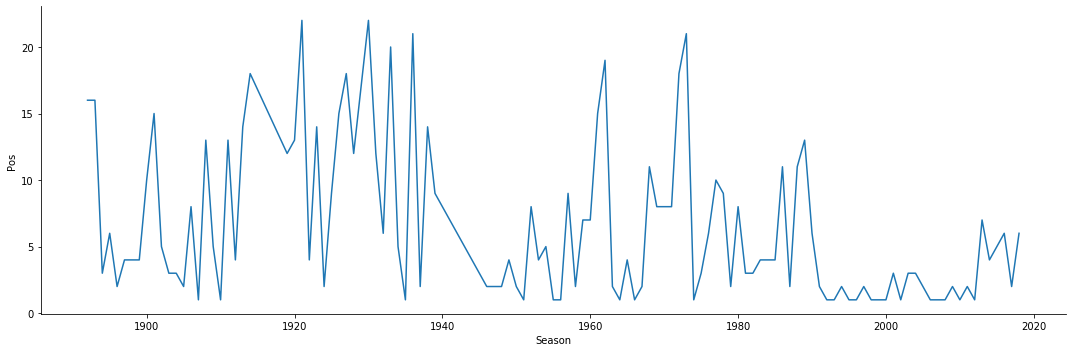

In [9]:
sns.relplot(x="Season", y="Pos", ci=None, kind="line",dashes = False, markers=True, data=df, height = 5, aspect = 3)

In [9]:
X = df[['Season', 'P', 'W', 'D', 'L', 'F', 'A', 'Pts']]
y = df[['Pos']]
X1 = df[['Season', 'P', 'W', 'D', 'L', 'F', 'A', 'Pts']]
y1 = df[['Pos']]

# Linear Models

### 1.Linear Regression

In [10]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
lin_df = LinearRegression()  
lin_df.fit(X_train, y_train)
lr_pred = lin_df.predict(X_test)   
lr_pred[0:5]

array([[ 1.31866962],
       [ 4.54014728],
       [ 0.69793167],
       [12.63937238],
       [ 7.58472427]])

In [11]:
linrgr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
linrgr_r2 = r2_score(y_test, lr_pred)
print("RMSE Score for Test set: ",linrgr_rmse)
print("R2 Score: ",linrgr_r2)

RMSE Score for Test set:  2.2626875545095912
R2 Score:  0.8443609861077349


### Ridge Regression

In [12]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

from sklearn import linear_model
reg = linear_model.Ridge()
reg.fit(X_train, y_train)
rdg_pred = reg.predict(X_test)
print("The coefficients after ridge regression is :", reg.coef_)
print("The intercept after ridge regression is :", reg.intercept_)
rdg_pred[0:5]

The coefficients after ridge regression is : [[ 0.00617826  0.0481298  -0.45963089 -0.06774742  0.57550811 -0.08554471
   0.04408922  0.06564813]]
The intercept after ridge regression is : [-4.33539229]


array([[ 1.31854412],
       [ 4.5429008 ],
       [ 0.71210389],
       [12.63663888],
       [ 7.58237631]])

In [13]:
rdgrgr_rmse = np.sqrt(mean_squared_error(y_test, rdg_pred))
rdgrgr_r2 = r2_score(y_test, rdg_pred)
print("RMSE Score for Test set: ",rdgrgr_rmse)
print("R2 Score: ",rdgrgr_r2)

RMSE Score for Test set:  2.263217799255104
R2 Score:  0.844288031767283


### Lasso

In [14]:
# Finding the best value of alpha using cross validation
from sklearn.linear_model import LassoCV
regr = LassoCV()
regr.fit(X, y)
print(regr.alpha_)

0.7327364144008396


In [15]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

from sklearn import linear_model
clf = linear_model.Lasso(alpha=regr.alpha_)
clf.fit(X_train, y_train)
las_pred = clf.predict(X_test)
print("The coefficients after lasso regression is :", clf.coef_)
print("The intercept after lasso regression is :", clf.intercept_)
las_pred[0:5]

The coefficients after lasso regression is : [ 0.0148669   0.         -0.14047859  0.          0.47993567 -0.13437002
  0.08288278  0.        ]
The intercept after lasso regression is : [-20.05588601]


array([ 1.33456911,  4.87639238,  1.93079164, 12.13821938,  7.42099911])

In [16]:
lasrgr_rmse = np.sqrt(mean_squared_error(y_test, las_pred))
lasrgr_r2 = r2_score(y_test, las_pred)
print("RMSE Score for Test set: ",lasrgr_rmse)
print("R2 Score: ",lasrgr_r2)

RMSE Score for Test set:  2.3609449268776546
R2 Score:  0.8305502207664867


### ElasticNet

In [17]:
# Finding the best value of alpha using cross validation
from sklearn.linear_model import ElasticNetCV
regr = ElasticNetCV()
regr.fit(X, y)
print(regr.alpha_)

1.0338621098925476


In [18]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)
# Actual regression on test set
from sklearn.linear_model import ElasticNet
reg = ElasticNet(alpha=regr.alpha_)
reg.fit(X_train, y_train)
en_pred = reg.predict(X_test)
print("The coefficients after elasticnet regression is :", reg.coef_)
print("The intercept after elasticnet regression is :", reg.intercept_)
en_pred[0:5]

The coefficients after elasticnet regression is : [ 0.01531709  0.         -0.15405453  0.          0.46222544 -0.13392893
  0.08601409  0.        ]
The intercept after elasticnet regression is : [-20.66919727]


array([ 1.36796918,  4.875334  ,  1.93053884, 12.21106485,  7.40786507])

In [19]:
enrgr_rmse = np.sqrt(mean_squared_error(y_test, en_pred))
enrgr_r2 = r2_score(y_test, en_pred)
print("RMSE Score for Test set: ",enrgr_rmse)
print("R2 Score: ",enrgr_r2)

RMSE Score for Test set:  2.357991314109003
R2 Score:  0.8309739290559228


### LassoLars

In [20]:
# Finding the best value of alpha using cross validation
from sklearn.linear_model import LassoLarsCV
regr = LassoLarsCV()
regr.fit(X, y)
print(regr.alpha_)

0.0010430707940392737


In [21]:
from sklearn import linear_model
reg = linear_model.LassoLars(alpha=regr.alpha_)
reg.fit(X_train, y_train)
lslr_pred = reg.predict(X_test)
print("The coefficients after elasticnet regression is :", reg.coef_)
print("The intercept after elasticnet regression is :", reg.intercept_)
lslr_pred[0:5]

The coefficients after elasticnet regression is : [ 0.00722146  0.         -0.38899657 -0.01155546  0.62464756 -0.08562444
  0.04222376  0.05724959]
The intercept after elasticnet regression is : [-6.33049024]


array([ 1.37480967,  4.56124216,  0.80109681, 12.61000856,  7.59035916])

In [22]:
lslrrgr_rmse = np.sqrt(mean_squared_error(y_test, lslr_pred))
lslrrgr_r2 = r2_score(y_test, lslr_pred)
print("RMSE Score for Test set: ",lslrrgr_rmse)
print("R2 Score: ",lslrrgr_r2)

RMSE Score for Test set:  2.264796167564896
R2 Score:  0.8440707689510422


# 3.Polynomial Regression

In [23]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import PolynomialFeatures

from sklearn import linear_model

plrgr_rmse = np.zeros(9)
plrgr_r2 = np.zeros(9)

for i in range(1,10):
    poly_df = PolynomialFeatures(degree = i)
    transform_poly = poly_df.fit_transform(X_train)
    clf = linear_model.LinearRegression()
    clf.fit(transform_poly,y_train)
    polynomial_predict = clf.predict(poly_df.fit_transform(X_test))
    plrgr_rmse[i-1] = np.sqrt(mean_squared_error(y_test,polynomial_predict))
    plrgr_r2[i-1] = r2_score(y_test,polynomial_predict)
    print("\nThe predicted values with degree = ",i," is \n",polynomial_predict[0:5])
    print("\nRMSE Score of Test set for degree ", i," is: ",plrgr_rmse[i-1])
    print("R2 RMSE Score of Test set for degree ", i," is: ",plrgr_r2[i-1]) 

print("\nThe best RMSE score of Test Set is ", plrgr_rmse.min(), " with degree = ",plrgr_rmse.argmin()+1)
print("The max R2 score of Test Set is ", plrgr_r2.max(), " with degree = ",plrgr_r2.argmax()+1)


The predicted values with degree =  1  is 
 [[ 1.31866962]
 [ 4.54014728]
 [ 0.69793167]
 [12.63937238]
 [ 7.58472427]]

RMSE Score of Test set for degree  1  is:  2.2626875545095912
R2 RMSE Score of Test set for degree  1  is:  0.8443609861077349

The predicted values with degree =  2  is 
 [[-0.21774459]
 [ 6.95329833]
 [ 4.16636276]
 [13.27926898]
 [11.07016826]]

RMSE Score of Test set for degree  2  is:  3.7300460038762027
R2 RMSE Score of Test set for degree  2  is:  0.5770415843596699

The predicted values with degree =  3  is 
 [[ -0.40946514]
 [-30.97354618]
 [  3.47679273]
 [  0.73833789]
 [ 10.34313708]]

RMSE Score of Test set for degree  3  is:  12.499335368617173
R2 RMSE Score of Test set for degree  3  is:  -3.7494479854495406

The predicted values with degree =  4  is 
 [[ 0.4438998 ]
 [-2.25651657]
 [ 1.14127662]
 [ 9.50408105]
 [ 6.13757663]]

RMSE Score of Test set for degree  4  is:  9.561075421989974
R2 RMSE Score of Test set for degree  4  is:  -1.778963115490127

# 4.Decision Tree Regression

In [24]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

k = ['mse', 'friedman_mse', 'mae']
dt_rmse = np.zeros(3)
dt_r2 = np.zeros(3)
n = 0

from sklearn.tree import DecisionTreeRegressor
for i in k:
    dt_reg = DecisionTreeRegressor(criterion = i)          # create  DecisionTreeReg with sklearn
    dt_reg.fit(X_train,y_train)
    dt_predict = dt_reg.predict(X_test)
    dt_rmse[n] = np.sqrt(mean_squared_error(y_test,dt_predict))
    dt_r2[n] = r2_score(y_test,dt_predict)
    print("\nThe predicted values for Test Set using criterion = ",i," is: ",dt_predict[0:5])
    print("\nThe RMSE score for Test Set using criterion = ",i," is: ",dt_rmse[n])
    print("The R2 score for Test Set using criterion = ",i," is: ",dt_r2[n])
    n += 1   
print("\nThe best RMSE score for Test Set is ", dt_rmse.min())
print("The max R2 score of Test Set is ", dt_r2.max())   


The predicted values for Test Set using criterion =  mse  is:  [ 1.  4.  1. 15.  6.]

The RMSE score for Test Set using criterion =  mse  is:  1.7716909687891083
The R2 score for Test Set using criterion =  mse  is:  0.9045787202101707

The predicted values for Test Set using criterion =  friedman_mse  is:  [ 1.  4.  1. 18.  8.]

The RMSE score for Test Set using criterion =  friedman_mse  is:  1.922093765778466
The R2 score for Test Set using criterion =  friedman_mse  is:  0.8876899981234753

The predicted values for Test Set using criterion =  mae  is:  [ 1.  4.  2. 12.  4.]

The RMSE score for Test Set using criterion =  mae  is:  2.0
The R2 score for Test Set using criterion =  mae  is:  0.8784012009757928

The best RMSE score for Test Set is  1.7716909687891083
The max R2 score of Test Set is  0.9045787202101707


# Ensemble Methods

### Random Forest Model

In [25]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

k = ['mse', 'mae']
n = 0
rf_rmse = np.zeros(2)
rf_r2 = np.zeros(2)

from sklearn.ensemble import RandomForestRegressor
for i in k:
    rf_reg = RandomForestRegressor(criterion = i)
    rf_reg.fit(X_train,y_train)
    rf_pred = rf_reg.predict(X_test)
    rf_rmse[n] = np.sqrt(mean_squared_error(y_test,rf_pred))
    rf_r2[n] = r2_score(y_test,dt_predict)
    print("\nThe predicted values for Test Set using criterion = ",i," is: ",rf_pred[0:5])
    print("\nThe RMSE score for Test Set using criterion = ",i," is: ",rf_rmse[n])
    print("The R2 score for Test Set using criterion = ",i," is: ",rf_r2[n])
    n += 1   
    
print("\nThe best RMSE score for Test Set is ", rf_rmse.min())
print("The max R2 score of Test Set is ", rf_r2.max())       


The predicted values for Test Set using criterion =  mse  is:  [ 1.36  5.05  1.34 13.72  6.7 ]

The RMSE score for Test Set using criterion =  mse  is:  1.6422604679052726
The R2 score for Test Set using criterion =  mse  is:  0.8784012009757928

The predicted values for Test Set using criterion =  mae  is:  [ 1.47  5.18  1.54 13.66  6.24]

The RMSE score for Test Set using criterion =  mae  is:  1.6089238984834275
The R2 score for Test Set using criterion =  mae  is:  0.8784012009757928

The best RMSE score for Test Set is  1.6089238984834275
The max R2 score of Test Set is  0.8784012009757928


### ADABoost

In [26]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

k = ['linear', 'square', 'exponential']
n = 0
adb_rmse = np.zeros(3)
adb_r2 = np.zeros(3)

from sklearn.ensemble import AdaBoostRegressor
for i in k:
    ada_regr = AdaBoostRegressor(loss = i)
    ada_regr.fit(X_train,y_train)
    ada_pred = ada_regr.predict(X_test)
    adb_rmse[n] = np.sqrt(mean_squared_error(y_test,ada_pred))
    adb_r2[n] = r2_score(y_test,ada_pred)
    print("\nThe predicted values for Test Set using loss = ",i," is: ",ada_pred[0:5])
    print("\nThe RMSE score for Test Set using loss = ",i," is: ",adb_rmse[n])
    print("The R2 score for Test Set using loss = ",i," is: ",adb_r2[n])
    n += 1   
print("\nThe best RMSE score for Test Set is ", adb_rmse.min())
print("The max R2 score of Test Set is ", adb_r2.max())           


The predicted values for Test Set using loss =  linear  is:  [ 2.7         5.25        2.21428571 12.33333333  7.        ]

The RMSE score for Test Set using loss =  linear  is:  1.6997394127004253
The R2 score for Test Set using loss =  linear  is:  0.912171799677965

The predicted values for Test Set using loss =  square  is:  [ 2.07692308  5.4         2.07692308 12.4         6.75      ]

The RMSE score for Test Set using loss =  square  is:  1.4557348159345431
The R2 score for Test Set using loss =  square  is:  0.9355780550946735

The predicted values for Test Set using loss =  exponential  is:  [ 2.38461538  5.45454545  2.22222222 12.15789474  7.05882353]

The RMSE score for Test Set using loss =  exponential  is:  1.7311800998281635
The R2 score for Test Set using loss =  exponential  is:  0.9088925698700224

The best RMSE score for Test Set is  1.4557348159345431
The max R2 score of Test Set is  0.9355780550946735


### Gradient Boosting

In [27]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

k = ['ls', 'lad', 'huber', 'quantile']
n = 0
gdb_rmse = np.zeros(4)
gdb_r2 = np.zeros(4)

from sklearn.ensemble import GradientBoostingRegressor

for i in k:
    reg = GradientBoostingRegressor(loss = i)
    reg.fit(X_train, y_train)
    grdbst_pred = reg.predict(X_test)
    gdb_rmse[n] = np.sqrt(mean_squared_error(y_test,grdbst_pred))
    gdb_r2[n] = r2_score(y_test,grdbst_pred)
    print("\nThe predicted values for Test Set using loss = ",i," is: ",grdbst_pred[0:5])
    print("\nThe RMSE score for Test Set using loss = ",i," is: ",gdb_rmse[n])
    print("The R2 score for Test Set using loss = ",i," is: ",gdb_r2[n])
    n += 1   
print("\nThe best RMSE score for Test Set is ", gdb_rmse.min())
print("The max R2 score of Test Set is ", gdb_r2.max())    


The predicted values for Test Set using loss =  ls  is:  [ 1.05566552  4.40624537  1.27301851 12.82771663  6.54812902]

The RMSE score for Test Set using loss =  ls  is:  1.6077918600656498
The R2 score for Test Set using loss =  ls  is:  0.9214169383040862

The predicted values for Test Set using loss =  lad  is:  [ 1.15064174  4.35034695  1.31265632 12.97369482  8.42129449]

The RMSE score for Test Set using loss =  lad  is:  1.699343420701754
The R2 score for Test Set using loss =  lad  is:  0.9122127179658212

The predicted values for Test Set using loss =  huber  is:  [ 1.0909835   4.2322628   1.15679456 12.98438256  6.41204259]

The RMSE score for Test Set using loss =  huber  is:  1.840811238425116
The R2 score for Test Set using loss =  huber  is:  0.896988002530873

The predicted values for Test Set using loss =  quantile  is:  [ 4.03763295  7.94378289  4.02335062 15.3202069   8.60232694]

The RMSE score for Test Set using loss =  quantile  is:  2.4366912586409293
The R2 scor

# KNearestNeighbor

In [28]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

from sklearn.neighbors import KNeighborsRegressor

n = 0
knn_rmse = np.zeros(9)
knn_r2 = np.zeros(9)

for i in range(1,10):
    neigh = KNeighborsRegressor(n_neighbors=i)
    neigh.fit(X_train, y_train)
    knn_pred = neigh.predict(X_test)
    knn_rmse[n] = np.sqrt(mean_squared_error(y_test,knn_pred))
    knn_r2[n] = r2_score(y_test,knn_pred)
    print("\nThe predicted values for Test Set with neighbor k = ",i," is: \n",knn_pred[0:5])
    print("\nThe RMSE score for Test Set with neighbor k = ",i," is: ",knn_rmse[n])
    print("The R2 score for Test Set with neighbor k = ",i," is: ",knn_r2[n])
    n += 1   
print("\nThe best RMSE score for Test Set is ", knn_rmse.min(), " with neighbor k = ", knn_rmse.argmin()+1)
print("The max R2 score of Test Set is ", knn_r2.max(), " with neighbor k = ", knn_r2.argmax()+1)   


The predicted values for Test Set with neighbor k =  1  is: 
 [[ 1.]
 [ 4.]
 [ 1.]
 [12.]
 [ 4.]]

The RMSE score for Test Set with neighbor k =  1  is:  2.614064523559687
The R2 score for Test Set with neighbor k =  1  is:  0.7922687183336461

The predicted values for Test Set with neighbor k =  2  is: 
 [[ 1.5]
 [ 4. ]
 [ 1. ]
 [12. ]
 [ 7. ]]

The RMSE score for Test Set with neighbor k =  2  is:  2.598076211353316
The R2 score for Test Set with neighbor k =  2  is:  0.7948020266466503

The predicted values for Test Set with neighbor k =  3  is: 
 [[ 1.33333333]
 [ 4.        ]
 [ 1.33333333]
 [11.        ]
 [ 6.        ]]

The RMSE score for Test Set with neighbor k =  3  is:  2.1030548034164114
The R2 score for Test Set with neighbor k =  3  is:  0.8655470069431412

The predicted values for Test Set with neighbor k =  4  is: 
 [[ 1.5 ]
 [ 5.5 ]
 [ 1.5 ]
 [10.25]
 [ 5.5 ]]

The RMSE score for Test Set with neighbor k =  4  is:  2.074564880750767
The R2 score for Test Set with neigh

# Stochastic Gradient Descent

In [29]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

from sklearn.linear_model import SGDRegressor
reg = SGDRegressor()
reg.fit(X_train, y_train)
sgd_pred = reg.predict(X_test)
sgd_pred[0:5]

array([ 1.32216735,  4.54689573,  1.45735445, 12.27951623,  7.34855485])

In [30]:
sgd_rmse = np.sqrt(mean_squared_error(y_test,sgd_pred))
sgd_r2 = r2_score(y_test,sgd_pred)
print("RMSE Score for Test set: ",sgd_rmse)
print("R2 Score for Test set: ",sgd_r2)

RMSE Score for Test set:  2.3241850907570973
R2 Score for Test set:  0.8357857972513028


# Support Vector Machines

### SVR

In [31]:
#X= preprocessing.StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

from sklearn.svm import SVR
k = ['linear', 'poly', 'rbf', 'sigmoid']
n = 0
svr_rmse = np.zeros(4)
svr_r2 = np.zeros(4)

for i in k:
    reg = SVR(kernel = i)
    reg.fit(X_train, y_train)
    svr_pred = reg.predict(X_test)
    svr_rmse[n] = np.sqrt(mean_squared_error(y_test,svr_pred))
    svr_r2[n] = r2_score(y_test,svr_pred)
    print("\nThe predicted values for Test Set with kernel = ",i," is: ",svr_pred[0:5])
    print("\nThe RMSE score for Test Set with kernel = ",i," is: ",svr_rmse[n])
    print("The R2 score for Test Set with kernel = ",i," is: ",svr_r2[n])
    n += 1   
print("\nThe best RMSE score for Test Set is ", svr_rmse.min())
print("The max R2 score of Test Set is ", svr_r2.max())         


The predicted values for Test Set with kernel =  linear  is:  [ 1.037505    4.18732009  0.54218813 11.94738051  6.92730223]

The RMSE score for Test Set with kernel =  linear  is:  2.3586499807179213
The R2 score for Test Set with kernel =  linear  is:  0.8308794864872235

The predicted values for Test Set with kernel =  poly  is:  [4.68302957 4.19710125 4.97286641 7.88712934 5.84417151]

The RMSE score for Test Set with kernel =  poly  is:  4.1163494233948645
The R2 score for Test Set with kernel =  poly  is:  0.4848973771386217

The predicted values for Test Set with kernel =  rbf  is:  [ 1.52756726  4.92387266  0.49595535 11.7954299   7.1085628 ]

The RMSE score for Test Set with kernel =  rbf  is:  2.417698528838964
The R2 score for Test Set with kernel =  rbf  is:  0.8223056632447523

The predicted values for Test Set with kernel =  sigmoid  is:  [ 1.54081491  5.03169687  1.64045909 11.83632941  6.97917221]

The RMSE score for Test Set with kernel =  sigmoid  is:  2.6418545025769

### NuSVR

In [32]:
#X= preprocessing.StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

from sklearn.svm import NuSVR
k = ['linear', 'poly', 'rbf', 'sigmoid']
n = 0
nusvr_rmse = np.zeros(4)
nusvr_r2 = np.zeros(4)

for i in k:
    reg = NuSVR(kernel = i)
    reg.fit(X_train, y_train)
    nusvr_pred = reg.predict(X_test)
    nusvr_rmse[n] = np.sqrt(mean_squared_error(y_test,nusvr_pred))
    nusvr_r2[n] = r2_score(y_test,nusvr_pred)
    print("\nThe predicted values for Test Set with kernel = ",i," is: ",nusvr_pred[0:5])
    print("\nThe RMSE score for Test Set with kernel = ",i," is: ",nusvr_rmse[n])
    print("The R2 score for Test Set with kernel = ",i," is: ",nusvr_r2[n])
    n += 1   
print("\nThe best RMSE score for Test Set is ", nusvr_rmse.min())
print("The max R2 score of Test Set is ", nusvr_r2.max())         


The predicted values for Test Set with kernel =  linear  is:  [ 1.07778627  4.27180899  0.98880154 12.38281384  7.19868214]

The RMSE score for Test Set with kernel =  linear  is:  2.3067286364929034
The R2 score for Test Set with kernel =  linear  is:  0.8382432887236895

The predicted values for Test Set with kernel =  poly  is:  [ 6.19198564  6.30287835  6.35957174 10.31284751  7.15670768]

The RMSE score for Test Set with kernel =  poly  is:  4.132400893273624
The R2 score for Test Set with kernel =  poly  is:  0.48087231804803154

The predicted values for Test Set with kernel =  rbf  is:  [ 2.24352608  5.61158932  1.3095644  11.38428386  7.3887419 ]

The RMSE score for Test Set with kernel =  rbf  is:  2.5896659227509766
The R2 score for Test Set with kernel =  rbf  is:  0.7961283779665711

The predicted values for Test Set with kernel =  sigmoid  is:  [ 2.25070164  6.12423379  2.19602895 12.41603352  7.96102686]

The RMSE score for Test Set with kernel =  sigmoid  is:  2.7255180

### LinearSVR

In [33]:
#X= preprocessing.StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

from sklearn.svm import LinearSVR

reg = LinearSVR()
reg.fit(X_train, y_train)
linsvr_pred = reg.predict(X_test)
linsvr_rmse = np.sqrt(mean_squared_error(y_test,linsvr_pred))
linsvr_r2 = r2_score(y_test,linsvr_pred)
print("\nThe predicted values for Test Set is: ",linsvr_pred[0:5])
print("\nThe RMSE score for Test Set is: ",linsvr_rmse)
print("The R2 score for Test Set is: ",linsvr_r2)  


The predicted values for Test Set is:  [ 0.79603268  4.11431086  0.13268411 11.91286142  6.95344725]

The RMSE score for Test Set is:  2.3726123875215257
The R2 score for Test Set is:  0.8288712881009315


# Report on accuracy of different algorithms using RMSE value and R2 score

In [34]:
# rmse = root mean squared score.......r2 = R2-Score
# 1.Linear Models
# 1.1. Linear Regression
linrgr_rmse
linrgr_r2

# 1.2. Ridge Regression
rdgrgr_rmse
rdgrgr_r2

# 1.3. Lasso
lasrgr_rmse
lasrgr_r2

# 1.4. ElasticNet
enrgr_rmse
enrgr_r2

# 1.5. LarsLasso
lslrrgr_rmse
lslrrgr_r2

# 2.Polynomial Regression
plrgr_rmse = plrgr_rmse.min()
plrgr_r2 = plrgr_r2.max()

# 3.Decision Tree
dt_rmse = dt_rmse.min()
dt_r2 = dt_r2.max()

# 4.Ensemble Methods
# 4.1. Random Forest
rf_rmse = rf_rmse.min()
rf_r2 = rf_r2.max()

# 4.2. AdaBoost
adb_rmse = adb_rmse.min()
adb_r2 = adb_r2.max()

# 4.3. GradientBoost
gdb_rmse = gdb_rmse.min()
gdb_r2 = gdb_r2.max()

# 5.KNearestNeighbor
knn_rmse = knn_rmse.min()
knn_r2 = knn_r2.max()

# 6.Stochastic Gradient Descent
sgd_rmse
sgd_r2

# 7.Support Vector Machines
# 7.1. SVR
svr_rmse = svr_rmse.min()
svr_r2 = svr_r2.max()

# 7.2. NuSVR
nusvr_rmse = nusvr_rmse.min()
nusvr_r2 = nusvr_r2.max()
# 7.3. LinearSVR
linsvr_rmse = linsvr_rmse
linsvr_r2 = linsvr_r2

#max of all
min_rmse = [linrgr_rmse,rdgrgr_rmse,lasrgr_rmse,enrgr_rmse,lslrrgr_rmse,plrgr_rmse,dt_rmse,rf_rmse,adb_rmse,gdb_rmse,knn_rmse,sgd_rmse,svr_rmse,nusvr_rmse,linsvr_rmse]
max_r2 = [linrgr_r2,rdgrgr_r2,lasrgr_r2,enrgr_r2,lslrrgr_r2,plrgr_r2,dt_r2,rf_r2,adb_r2,gdb_r2,knn_r2,sgd_r2,svr_r2,nusvr_r2,linsvr_r2]

## Final Report

In [35]:
data = {'Algorithm':['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet Regression', 'LarsLasso Regression', 'Polynomial Regression','Decision Tree Regression','Random Forest Regression','AdaBoost Regression','Gradient Boosting Regression','KNearest Neighbor Regression','Stochastic Gradient Regression','Support Vector Regression','Nu Support Vector Regression','Linear Support Vector Regression'], 
        'R2-Sore':max_r2, 'Root Mean Squared Error':min_rmse}
s = pd.DataFrame(data, index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
s

,Algorithm,R2-Sore,Root Mean Squared Error
1,Linear Regression,0.844361,2.262688
2,Ridge Regression,0.844288,2.263218
3,Lasso Regression,0.830550,2.360945
4,ElasticNet Regression,0.830974,2.357991
5,LarsLasso Regression,0.844071,2.264796
6,Polynomial Regression,0.844361,2.262688
7,Decision Tree Regression,0.904579,1.771691
8,Random Forest Regression,0.878401,1.608924
9,AdaBoost Regression,0.935578,1.455735
10,Gradient Boosting Regression,0.921417,1.607792


In [36]:
print("The best R-squared score is shown by ADABoost Regression with loss = square")
print("\nR2 Score = ",adb_r2)

The best R-squared score is shown by ADABoost Regression with loss = square

R2 Score =  0.9355780550946735


# Creating a test set for the next 30 years and predicting Manchester United's League Standing using the best algorithm.

In [38]:
fd = pd.read_csv(r'E:\Datasets\Manchester_United_prediction\All Season data\ManUtd.csv')   
fd.head(100)

,Season,Division,P,W,D,L,F,A,Pts,Pos
0,1892,Div 1,30.0,6.0,6.0,18.0,50.0,85.0,18.0,16.0
1,1893,Div 1,30.0,6.0,2.0,22.0,36.0,72.0,14.0,16.0
2,1894,Div 2,30.0,15.0,8.0,7.0,78.0,44.0,38.0,3.0
3,1895,Div 2,30.0,15.0,3.0,12.0,66.0,57.0,33.0,6.0
4,1896,Div 2,30.0,17.0,5.0,8.0,56.0,34.0,39.0,2.0
...,...,...,...,...,...,...,...,...,...,...
95,1987,Div 1,40.0,23.0,12.0,5.0,71.0,38.0,81.0,2.0
96,1988,Div 1,38.0,13.0,12.0,13.0,45.0,35.0,51.0,11.0
97,1989,Div 1,38.0,13.0,9.0,16.0,46.0,47.0,48.0,13.0
98,1990,Div 1,38.0,16.0,12.0,10.0,58.0,45.0,59.0,6.0


In [39]:
fd = fd.drop(['Division'], axis = 1)
fd.dropna(subset = ["P"], inplace=True)

In [40]:
fd.isnull().sum()

Season    0
P         0
W         0
D         0
L         0
F         0
A         0
Pts       0
Pos       0
dtype: int64

In [41]:
print("mean of W = ",round(fd.W.mean()))
print("std of W = ",round(fd.W.std()))
min1 = round(fd.W.mean())-round(fd.W.std())
max1 = round(fd.W.mean())+round(fd.W.std())
print("The random value which we require is between ",min1," and ",max1)

mean of W =  19
std of W =  6
The random value which we require is between  13  and  25


In [42]:
w = np.zeros(30)
for i in range(0,30):
    w[i] = random.randint(13,25)

In [43]:
print("mean of D = ",round(fd.D.mean()))
print("std of D = ",round(fd.D.std()))
min2 = round(fd.D.mean())-round(fd.D.std())
max2 = round(fd.D.mean())+round(fd.D.std())
print("The random value which we require is between ",min2," and ",max2)

mean of D =  9
std of D =  3
The random value which we require is between  6  and  12


In [44]:
d = np.zeros(30)
for i in range(0,30):
    d[i] = random.randint(6,12)

In [45]:
l = np.zeros(30)
for i in range(0,30):
    l[i] = (38 - (w[i]+d[i]))

In [46]:
print("mean of F = ",round(fd.F.mean()))
print("std of F = ",round(fd.F.std()))
min4 = round(fd.F.mean())-round(fd.F.std())
max4 = round(fd.F.mean())+round(fd.F.std())
print("The random value which we require is between ",min4," and ",max4)

mean of F =  68
std of F =  16
The random value which we require is between  52  and  84


In [47]:
f = np.zeros(30)
for i in range(0,30):
    f[i] = random.randint(52,84)

In [48]:
print("mean of A = ",round(df.A.mean()))
print("std of A = ",round(df.A.std()))
min5 = round(fd.A.mean())-round(fd.A.std())
max5 = round(fd.A.mean())+round(fd.A.std())
print("The random value which we require is between ",min5," and ",max5)

mean of A =  49
std of A =  18
The random value which we require is between  31  and  67


In [49]:
a = np.zeros(30)
for i in range(0,30):
    a[i] = random.randint(31,67)

In [50]:
p = np.zeros(30)
for i in range(0,30):
    p[i] = (3*w[i]+d[i])

In [51]:
n = 0
test_set = np.zeros((30,8))
s = 38
for i in range(2019,2049):
    test_set[n] = [i, s, w[n], d[n], l[n], f[n], a[n], p[n]]
    n += 1

In [52]:
test_set[0:5]

array([[2019.,   38.,   23.,    8.,    7.,   78.,   57.,   77.],
       [2020.,   38.,   15.,   10.,   13.,   77.,   36.,   55.],
       [2021.,   38.,   22.,   10.,    6.,   77.,   33.,   76.],
       [2022.,   38.,   19.,   10.,    9.,   76.,   50.,   67.],
       [2023.,   38.,   21.,    9.,    8.,   54.,   67.,   72.]])

### ADABoost

In [53]:
from sklearn.ensemble import AdaBoostRegressor

reg = AdaBoostRegressor(loss = 'linear')
reg.fit(X1, y1)
grdbst_pred = reg.predict(test_set)


In [54]:
print("\nThe predicted values for Test Set is: ",grdbst_pred[0:5])


The predicted values for Test Set is:  [2.42105263 7.48148148 2.42105263 3.375      2.97222222]


In [55]:
plpred = np.round(grdbst_pred)

In [56]:
plpred[0:5]

array([2., 7., 2., 3., 3.])